[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SahilTikale/FLOCX-Notebooks/master?labpath=validating_simulator_withNodes%2FSiloSimRun_VS_nonodeSim_VS_RealExperiment.ipynb)
to interact with this notebook

# This Notebook demonstrates that the SILO simulator is validated using runs from Real World Experiments.


In [1]:
import pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import nbinom
import math

# Screen size adjustment for the graphs
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
realSilo = 'real_world_experimental_data'
ostackR06 = pd.read_csv(realSilo+'/ostack_silo-12h-run-06_metrics.csv')
sparkR07 = pd.read_csv(realSilo+'/spark_silo-12h-run-07_metrics.csv')
slurmR03 = pd.read_csv(realSilo+'/slurm_silo-12h-run-03_metrics.csv')

In [3]:
simSilo = 'simulation_data'
sim_bgd_main = pd.read_csv(simSilo+'/bigdata_main_all_output.csv')
sim_cld50 = pd.read_csv(simSilo+'/cloud50_all_output.csv')
sim_hpc_main = pd.read_csv(simSilo+'/hpc_main_all_output.csv')

In [4]:
nonode_simSilo = 'nonode_sim_data'
nonode_sim_bgd_main = pd.read_csv(nonode_simSilo+'/bigdata_main_all_output.csv')
nonode_sim_cld50 = pd.read_csv(nonode_simSilo+'/cloud50_all_output.csv')
nonode_sim_hpc_main = pd.read_csv(nonode_simSilo+'/hpc_main_all_output.csv')

In [5]:
def node_usage_graph(data=None, max_nodes=None, title=None):
    nodeusage = data
    ax = nodeusage.set_index('timestamp').plot(figsize=(32, 8))
    
    #if 'nodes_inuse' in nodeusage.columns and 'nodes_indemand' not in nodeusage.columns:
    #    max_nodes = max(max(nodeusage['nodes_inuse']), max(nodeusage['nodes_owned']))
    #    y_tick_value_list = [*range(0, max_nodes+1, 3)]
    #    ax.set_yticks(y_tick_value_list)
        
    x_tick_value_list = [*range(0, 43201, 600)]
    if max_nodes:
        y_tick_value_list = [*range(0, max_nodes+1, 3)]
        ax.set_yticks(y_tick_value_list)

    ax.set_xticks(x_tick_value_list)
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.xlabel('Time interval in seconds', fontsize=24)
    plt.xticks(rotation=45)
    plt.ylabel('No of Nodes', fontsize=24)
    plt.title(title, fontsize=24)
    plt.legend(fontsize=18)
    plt.grid()
    plt.show()
    
def core_usage_graph(data, max_nodes, title):
    coreusage = data
    ax = coreusage.set_index('timestamp').plot(figsize=(32, 8))
    max_cores = 24*max_nodes

    x_tick_value_list = [*range(0, 43201, 600)]
    y_tick_value_list = [*range(0, max_cores+1, 72)]
    ax.set_xticks(x_tick_value_list)
    ax.set_yticks(y_tick_value_list)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.xlabel('Time interval in seconds', fontsize=24)
    plt.xticks(rotation=45)
    plt.ylabel('No of Cores', fontsize=24)
    plt.title(title, fontsize=24)
    plt.legend(fontsize=18)
    plt.grid()
    plt.show()

# Validating Cloud Simulation

In [6]:
# collect timestamps at which utilization data is available for the real experiment. 
real_timestamps = ostackR06['timestamp'].to_list() 
#ostackR06.tail() #shows that the value we need is 43191 
real_run = ostackR06.loc[ostackR06['timestamp']<= 43200].copy()
real_run.tail()

,timestamp,nodes_owned,nodes_cur_cap,nodes_in_use,nodes_indemand,cores_owned,cores_cur_cap,cores_in_use,cores_indemand,jobs_waiting,jobs_running,jobs_completed,jobs_failed
4080,43154,20,20,6,na,480,480,122,na,0,35,784,NaN
4081,43164,20,20,6,na,480,480,122,na,0,35,784,NaN
4082,43175,20,20,6,na,480,480,122,na,0,35,784,NaN
4083,43185,20,20,6,na,480,480,122,na,0,35,784,NaN
4084,43196,20,20,6,na,480,480,122,na,0,35,784,NaN


In [7]:
sim_cld50.tail() # Simulator can generate the utilization data for each second.

,timestamp,cluster,nodes_owned,nodes_borrowed,nodes_offered,nodes_cur_cap,nodes_inuse,nodes_indemand,jobs_waiting,jobs_running,jobs_done,jobs_rerun,cores_owned,cores_cur_cap,cores_inuse,cores_indemand
43195,43195,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43196,43196,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43197,43197,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43198,43198,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN
43199,43199,cloud50,20,0,0,20,6,NaN,0,35,784,0,480,480,122.0,NaN


In [8]:
# Select only those records from the simulation data that match the timestamp (offsets) available in the real experiment.
nonode_sim_run = nonode_sim_cld50.loc[nonode_sim_cld50['timestamp'].isin(real_timestamps)].copy()
nonode_sim_run = nonode_sim_run.reset_index(drop=True)

# Select only those records from the simulation data that match the timestamp (offsets) available in the real experiment.
sim_run = sim_cld50.loc[sim_cld50['timestamp'].isin(real_timestamps)].copy()
sim_run = sim_run.reset_index(drop=True)


pandas.set_option('display.expand_frame_repr', False) # prints all columns without a line break. 
print('Records from Cloud Simulation that matches the experimental data')
print("\n ** ** Cloud SIMULATION (without Node model)** **\n")
print(nonode_sim_run[['timestamp', 'nodes_cur_cap', 'nodes_inuse', 'cores_owned', 'cores_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].tail())

print("\n ** ** Cloud SIMULATION (with Node model)** **\n")
print(sim_run[['timestamp', 'nodes_cur_cap', 'nodes_inuse', 'cores_owned', 'cores_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].tail())


print("\n ** ** REAL Cloud ** **\n")
print(real_run[['timestamp', 'nodes_cur_cap', 'nodes_in_use', 'cores_owned', 'cores_in_use', 'jobs_waiting', 'jobs_running', 'jobs_completed']].tail())

print ( "\n ** ** ** ** \n")

Records from Cloud Simulation that matches the experimental data

 ** ** Cloud SIMULATION (without Node model)** **

      timestamp  nodes_cur_cap  nodes_inuse  cores_owned  cores_inuse  jobs_waiting  jobs_running  jobs_done
4075      43154             20            6          480        122.0             0            35        784
4076      43164             20            6          480        122.0             0            35        784
4077      43175             20            6          480        122.0             0            35        784
4078      43185             20            6          480        122.0             0            35        784
4079      43196             20            6          480        122.0             0            35        784

 ** ** Cloud SIMULATION (with Node model)** **

      timestamp  nodes_cur_cap  nodes_inuse  cores_owned  cores_inuse  jobs_waiting  jobs_running  jobs_done
4075      43154             20            6          480        122.0  

## Cloud utilization graph

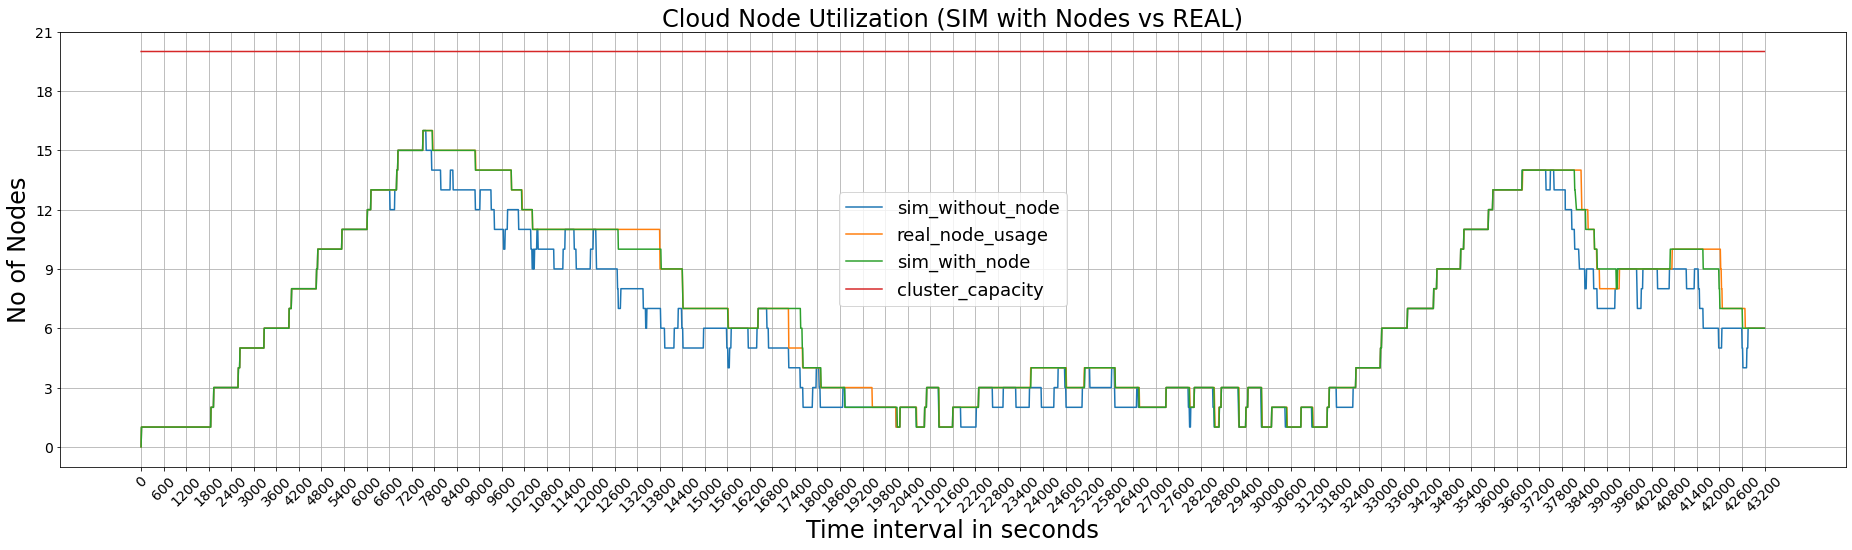

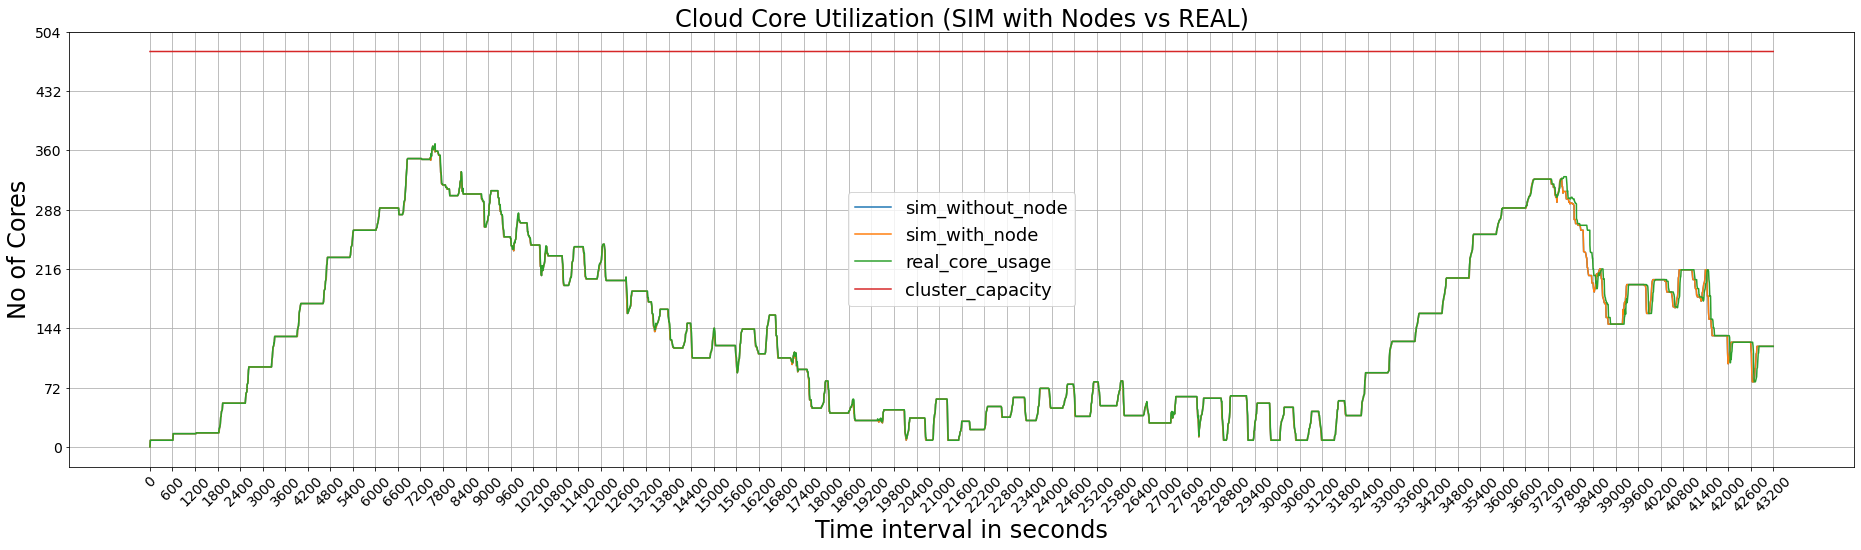

In [9]:
data = sim_run[['timestamp']]
cloud_silo_v_real = pd.DataFrame(data)
cloud_silo_v_real['sim_without_node'] = nonode_sim_run[['nodes_inuse']]
cloud_silo_v_real['real_node_usage'] = real_run[['nodes_in_use']]
cloud_silo_v_real['sim_with_node'] = sim_run[['nodes_inuse']]
cloud_silo_v_real['cluster_capacity'] = real_run[['nodes_owned']]

node_usage_graph(cloud_silo_v_real, 21, 'Cloud Node Utilization (SIM with Nodes vs REAL)')

print ("\n \n")
data = sim_run[['timestamp']]
cloud_silo_v_real = pd.DataFrame(data)
cloud_silo_v_real['sim_without_node'] = nonode_sim_run[['cores_inuse']]
cloud_silo_v_real['sim_with_node'] = sim_run[['cores_inuse']]
cloud_silo_v_real['real_core_usage'] = real_run[['cores_in_use']]
cloud_silo_v_real['cluster_capacity'] = real_run[['cores_owned']]

core_usage_graph(cloud_silo_v_real, 21, 'Cloud Core Utilization (SIM with Nodes vs REAL)')

# HPC Validation

In [10]:
slurmR03 = pd.read_csv(realSilo+'/slurm_silo-12h-run-03_metrics.csv')
sim_hpc_main = pd.read_csv(simSilo+'/hpc_main_all_output.csv')
nonode_sim_hpc_main = pd.read_csv(nonode_simSilo+'/hpc_main_all_output.csv')

real_timestamps = slurmR03['timestamp'].to_list()
real_run = slurmR03.loc[slurmR03['timestamp']<= 43200].copy()
#real_run.tail()

sim_run = sim_hpc_main.loc[sim_hpc_main['timestamp'].isin(real_timestamps)].copy()
sim_run = sim_run.reset_index(drop=True)
#sim_run.tail()

nonode_sim_run = nonode_sim_hpc_main.loc[nonode_sim_hpc_main['timestamp'].isin(real_timestamps)].copy()
nonode_sim_run = nonode_sim_run.reset_index(drop=True)

pandas.set_option('display.expand_frame_repr', False) # prints all columns without a line break. 
print('Records from HPC Simulation that matches the experimental data')
print("\n ** ** HPC SIMULATION with no Nodes** **\n")
print(nonode_sim_run[['timestamp', 'nodes_cur_cap', 'nodes_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].head(200).tail())


print("\n ** ** HPC SIMULATION with Nodes** **\n")
print(sim_run[['timestamp', 'nodes_cur_cap', 'nodes_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].head(200).tail())


print("\n ** ** HPC REAL ** **\n")
print(real_run[['timestamp', 'nodes_cur_cap', 'nodes_in_use', 'jobs_waiting', 'jobs_running', 'jobs_completed']].head(200).tail())

print ( "\n ** ** ** ** \n")

Records from HPC Simulation that matches the experimental data

 ** ** HPC SIMULATION with no Nodes** **

     timestamp  nodes_cur_cap  nodes_inuse  jobs_waiting  jobs_running  jobs_done
195       2081             49           49             9             9         23
196       2092             49           49            10             9         23
197       2102             49           49            10             9         24
198       2113             49           49            10             9         24
199       2124             49           49            10             9         24

 ** ** HPC SIMULATION with Nodes** **

     timestamp  nodes_cur_cap  nodes_inuse  jobs_waiting  jobs_running  jobs_done
195       2081             49           49             9             9         23
196       2092             49           49            10             9         23
197       2102             49           49            10             9         24
198       2113             49     

In [11]:
real_run.head(200).tail()

,timestamp,nodes_owned,nodes_cur_cap,nodes_in_use,nodes_indemand,jobs_waiting,jobs_running,jobs_completed,jobs_cancelled,jobs_failed
195,2081,49,49,49,46,9,9,23,0,0
196,2092,49,49,49,47,10,9,23,0,0
197,2102,49,49,49,48,11,9,23,0,0
198,2113,49,49,49,42,10,9,24,0,0
199,2124,49,49,49,42,10,9,24,0,0


## HPC utilization graph

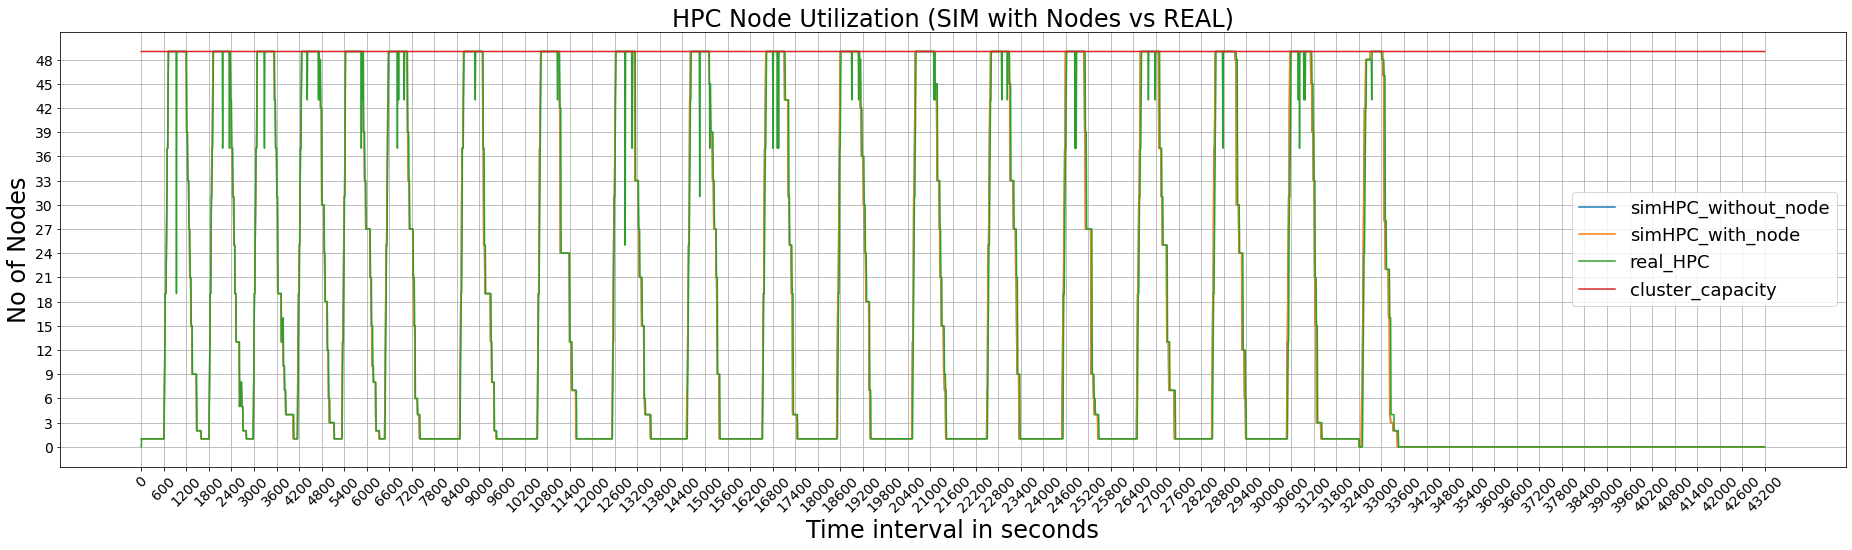

In [12]:
data = sim_run[['timestamp']]
hpc_silo_v_real = pd.DataFrame(data)
hpc_silo_v_real['simHPC_without_node'] = nonode_sim_run[['nodes_inuse']]
hpc_silo_v_real['simHPC_with_node'] = sim_run[['nodes_inuse']] 
hpc_silo_v_real['real_HPC'] = real_run[['nodes_in_use']]
hpc_silo_v_real['cluster_capacity'] = real_run[['nodes_owned']]

node_usage_graph(hpc_silo_v_real, 50, 'HPC Node Utilization (SIM with Nodes vs REAL)')

# BIGdata Validation

In [13]:
sparkR07 = pd.read_csv(realSilo+'/spark_silo-12h-run-07_metrics.csv')
sim_bgd_main = pd.read_csv(simSilo+'/bigdata_main_all_output.csv')
nonode_sim_bgd_main = pd.read_csv(nonode_simSilo+'/bigdata_main_all_output.csv')

real_timestamps = sparkR07['timestamp'].to_list()
#ostackR06.tail() #shows that the value we need is 43191 
real_run = sparkR07.loc[sparkR07['timestamp']<= 43200].copy()
#real_run.tail()

sim_run = sim_bgd_main.loc[sim_bgd_main['timestamp'].isin(real_timestamps)].copy()
sim_run = sim_run.reset_index(drop=True)
#sim_run.tail()

nonode_sim_run = nonode_sim_bgd_main.loc[nonode_sim_bgd_main['timestamp'].isin(real_timestamps)].copy()
nonode_sim_run = nonode_sim_run.reset_index(drop=True)

pandas.set_option('display.expand_frame_repr', False) # prints all columns without a line break. 
print('Records from Bigdata Simulation that matches the experimental data')
print("\n ** ** Bigdata SIMULATION with no Nodes** **\n")
print(nonode_sim_run[['timestamp', 'nodes_cur_cap', 'nodes_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].head(200).tail())


print("\n ** ** Bigdata SIMULATION with Nodes** **\n")
print(sim_run[['timestamp', 'nodes_cur_cap', 'nodes_inuse', 'jobs_waiting', 'jobs_running', 'jobs_done']].head(200).tail())


print("\n ** ** Bigdata REAL ** **\n")
print(real_run[['timestamp', 'nodes_cur_cap', 'nodes_in_use', 'jobs_waiting', 'jobs_running', 'jobs_completed']].head(200).tail())

print ( "\n ** ** ** ** \n")

Records from Bigdata Simulation that matches the experimental data

 ** ** Bigdata SIMULATION with no Nodes** **

     timestamp  nodes_cur_cap  nodes_inuse  jobs_waiting  jobs_running  jobs_done
195       2220             26            8            44            85        291
196       2237             26            8            40            91        292
197       2242             26            8            37            94        292
198       2254             26            8            36            95        294
199       2272             26            8            41            89        301

 ** ** Bigdata SIMULATION with Nodes** **

     timestamp  nodes_cur_cap  nodes_inuse  jobs_waiting  jobs_running  jobs_done
195       2220             26            8            44            85        291
196       2237             26            8            40            91        292
197       2242             26            8            37            94        292
198       2254        

## Bigdata utilization graph

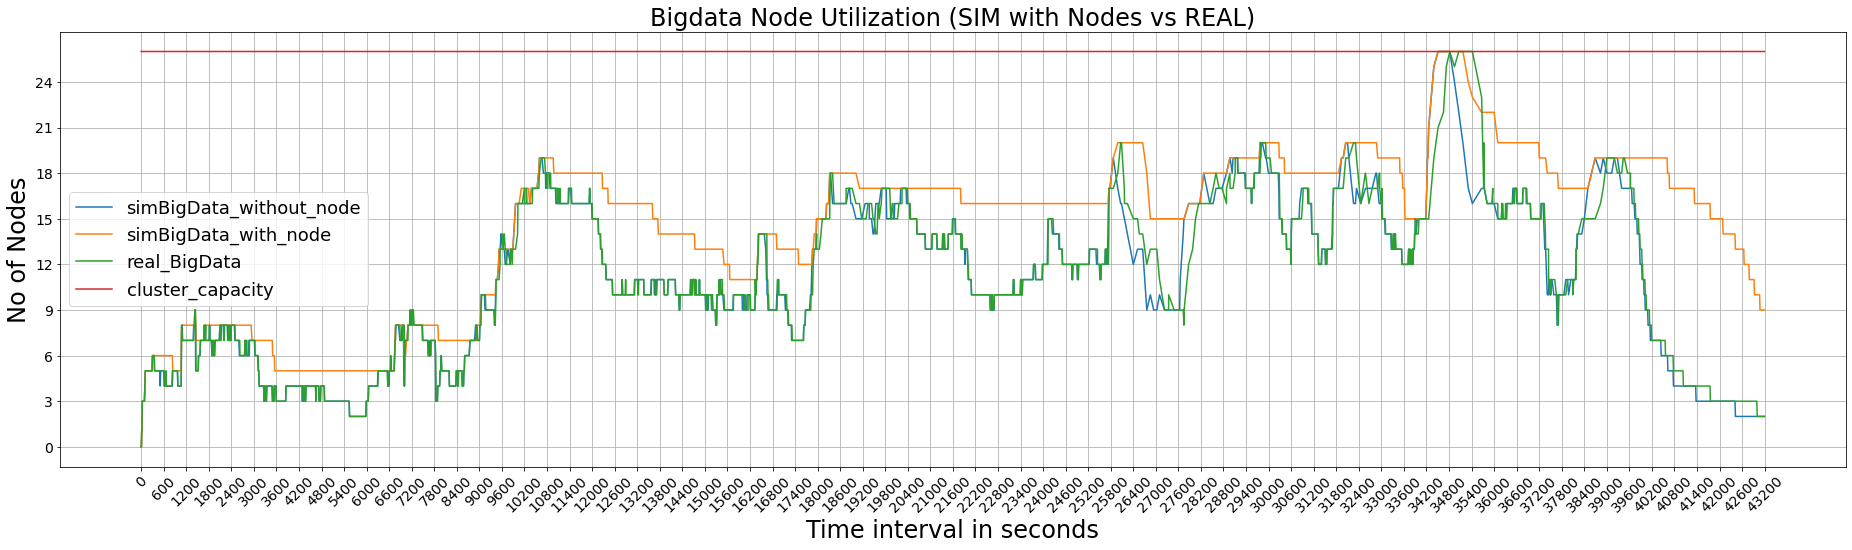

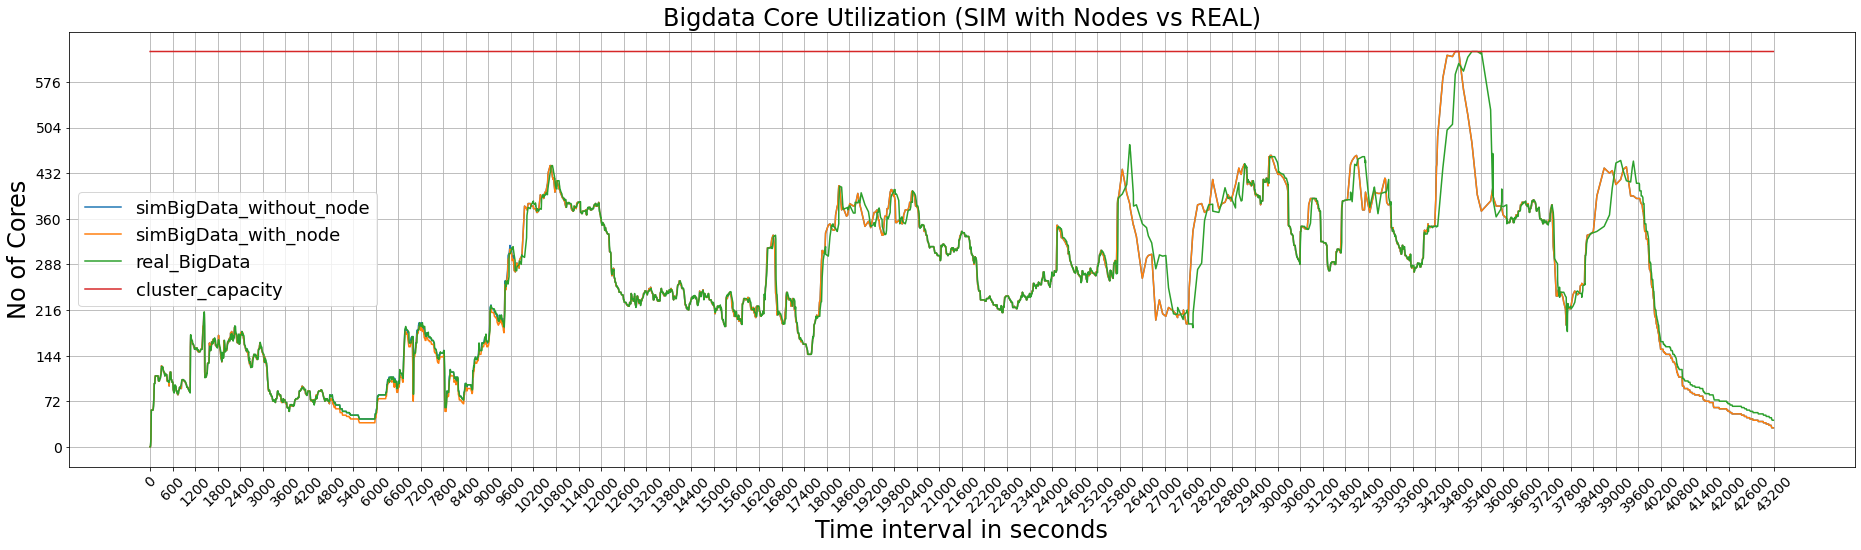

In [14]:
data = sim_run[['timestamp']]
bgd_silo_v_real = pd.DataFrame(data)
bgd_silo_v_real['simBigData_without_node'] = nonode_sim_run[['nodes_inuse']]
bgd_silo_v_real['simBigData_with_node'] = sim_run[['nodes_inuse']] 
bgd_silo_v_real['real_BigData'] = real_run[['nodes_in_use']]
bgd_silo_v_real['cluster_capacity'] = real_run[['nodes_owned']]

node_usage_graph(bgd_silo_v_real, 26, 'Bigdata Node Utilization (SIM with Nodes vs REAL)')

print ("\n \n")
data = sim_run[['timestamp']]
bgd_silo_v_real = pd.DataFrame(data)
bgd_silo_v_real['simBigData_without_node'] = nonode_sim_run[['cores_inuse']]
bgd_silo_v_real['simBigData_with_node'] = sim_run[['cores_inuse']] 
bgd_silo_v_real['real_BigData'] = real_run[['cores_in_use']]
bgd_silo_v_real['cluster_capacity'] = real_run[['cores_owned']]


core_usage_graph(bgd_silo_v_real, 26, 'Bigdata Core Utilization (SIM with Nodes vs REAL)')

# Graphs sufficient for the SILO validation:
* **SPARK:** Node-usage graph is not required. Only core-usage graph is sufficient for simulator validation. 
    * Since there is no way to do bin packing in the real world experiments getting simulator to mimic the node distribution behaviour is very complicated and unnecessary for our research. 
* **SLURM:** Core-usage graph is not required. Only node-usage graph is sufficient for simulator validation. 
    * Slurm jobs occupy the whole node and span multiple nodes.  Hence showing core-wise distribution is unnecessary.
* **OSTACK:** It is necessary to show that the simulator matches the real world behaviour both for node-usage and core-usage.